EED

In [16]:
# import torch
# from torch import nn
# from d2l import torch as d2l
import matplotlib.pyplot as plt
import PyEMD
import numpy as np
%matplotlib inline


import file_walker
import publicMethod

In [4]:
SITE_CODE = "722860"
paths = file_walker.file_walker().main(SITE_CODE)
print("data count:", len(paths))

Init file_walker Succeed.
[Errno 17] File exists: 'data_op/722860/'
Input:data/2013/722860-23119-2013.op.gz > data_op/722860/722860-23119-2013.op
Input:data/2014/722860-23119-2014.op.gz > data_op/722860/722860-23119-2014.op
Input:data/2015/722860-23119-2015.op.gz > data_op/722860/722860-23119-2015.op
Input:data/2012/722860-23119-2012.op.gz > data_op/722860/722860-23119-2012.op
Input:data/1944/722860-23119-1944.op.gz > data_op/722860/722860-23119-1944.op
Input:data/1943/722860-23119-1943.op.gz > data_op/722860/722860-23119-1943.op
Input:data/1988/722860-23119-1988.op.gz > data_op/722860/722860-23119-1988.op
Input:data/1981/722860-23119-1981.op.gz > data_op/722860/722860-23119-1981.op
Input:data/1975/722860-23119-1975.op.gz > data_op/722860/722860-23119-1975.op
Input:data/1972/722860-23119-1972.op.gz > data_op/722860/722860-23119-1972.op
Input:data/1986/722860-23119-1986.op.gz > data_op/722860/722860-23119-1986.op
Input:data/1987/722860-23119-1987.op.gz > data_op/722860/722860-23119-1987

In [5]:
tem_avg, tem_min, tem_max = {}, {}, {}
for path in paths:
    year = path.split('/')[-1].split("-")[-1].split(".")[0]
    tem_avg[year], tem_min[year], tem_max[year] = publicMethod.open_file(path)

In [6]:
len(tem_avg.values())

89

[]

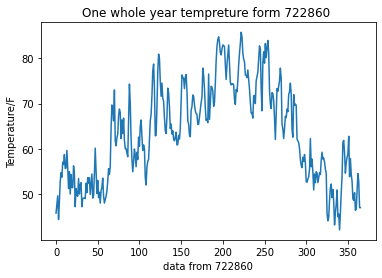

In [7]:
plt.plot(list(tem_avg.values())[-1])
plt.xlabel("data from %s"%SITE_CODE)
plt.ylabel("Temperature/F")
plt.title("One whole year tempreture form %s "%SITE_CODE)
plt.plot()

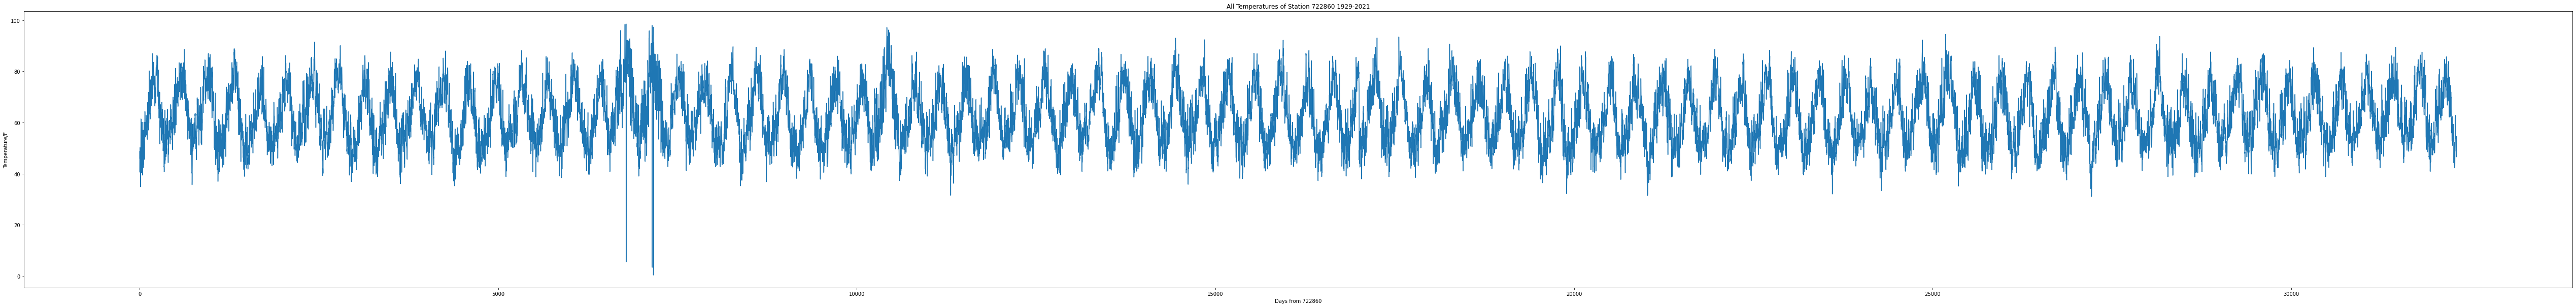

In [8]:
tem_avg_list_i = list(tem_avg.values())
tem_avg_list = []
for i in tem_avg_list_i:
    tem_avg_list.extend(i)
plt.plot(tem_avg_list)
plt.gcf().set_size_inches(90, 10)
plt.xlabel("Days from %s"%SITE_CODE)
plt.ylabel("Temperature/F")
plt.title("All Temperatures of Station %s 1929-2021"%SITE_CODE)
plt.plot()
plt.savefig("./fig/tem_avg.jpg")

In [10]:
type(tem_avg_list)

list

imfs_722860


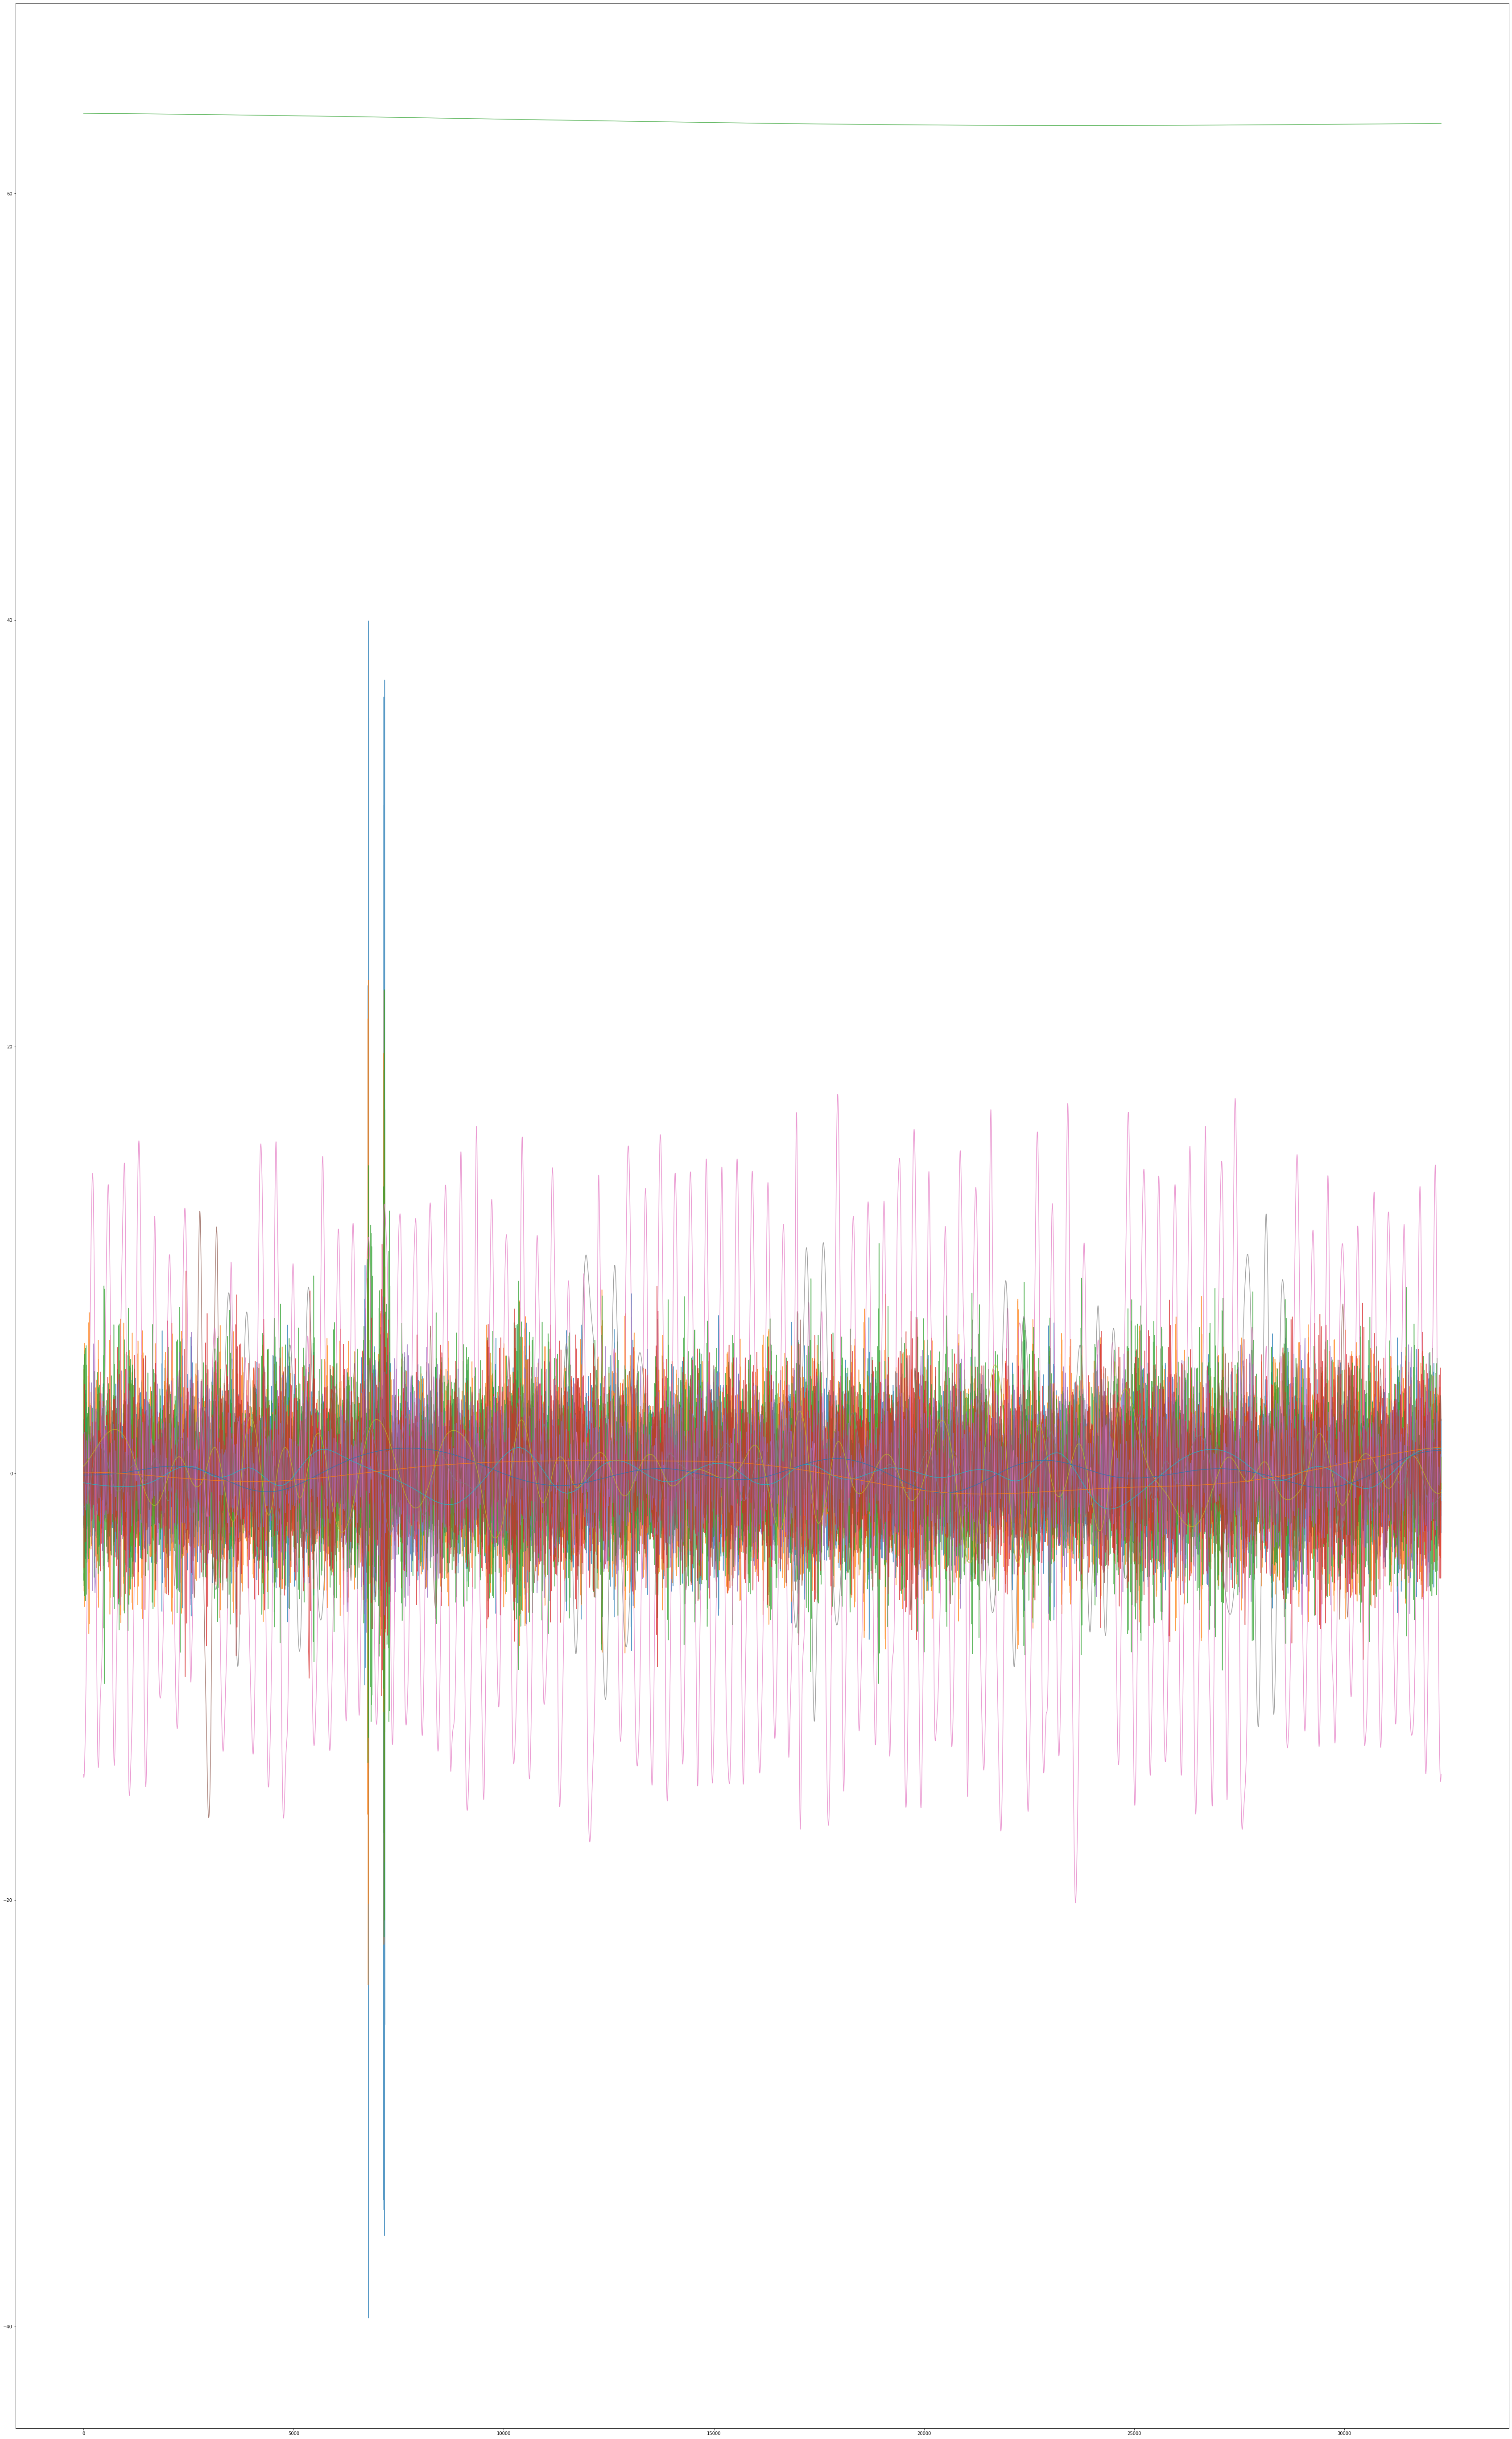

<Figure size 432x288 with 0 Axes>

In [23]:
print("imfs_%s"%SITE_CODE)
tem_avg_array = np.array(tem_avg_list)
emd_obj = PyEMD.EMD()
imfs = emd_obj.emd(tem_avg_array)
plt.plot(imfs.T, alpha = 0.75)
plt.gcf().set_size_inches(60, 100)
plt.savefig("./fig/imfs_%s.jpg"%SITE_CODE)
plt.show()

imfs_subplot_722860.jpg


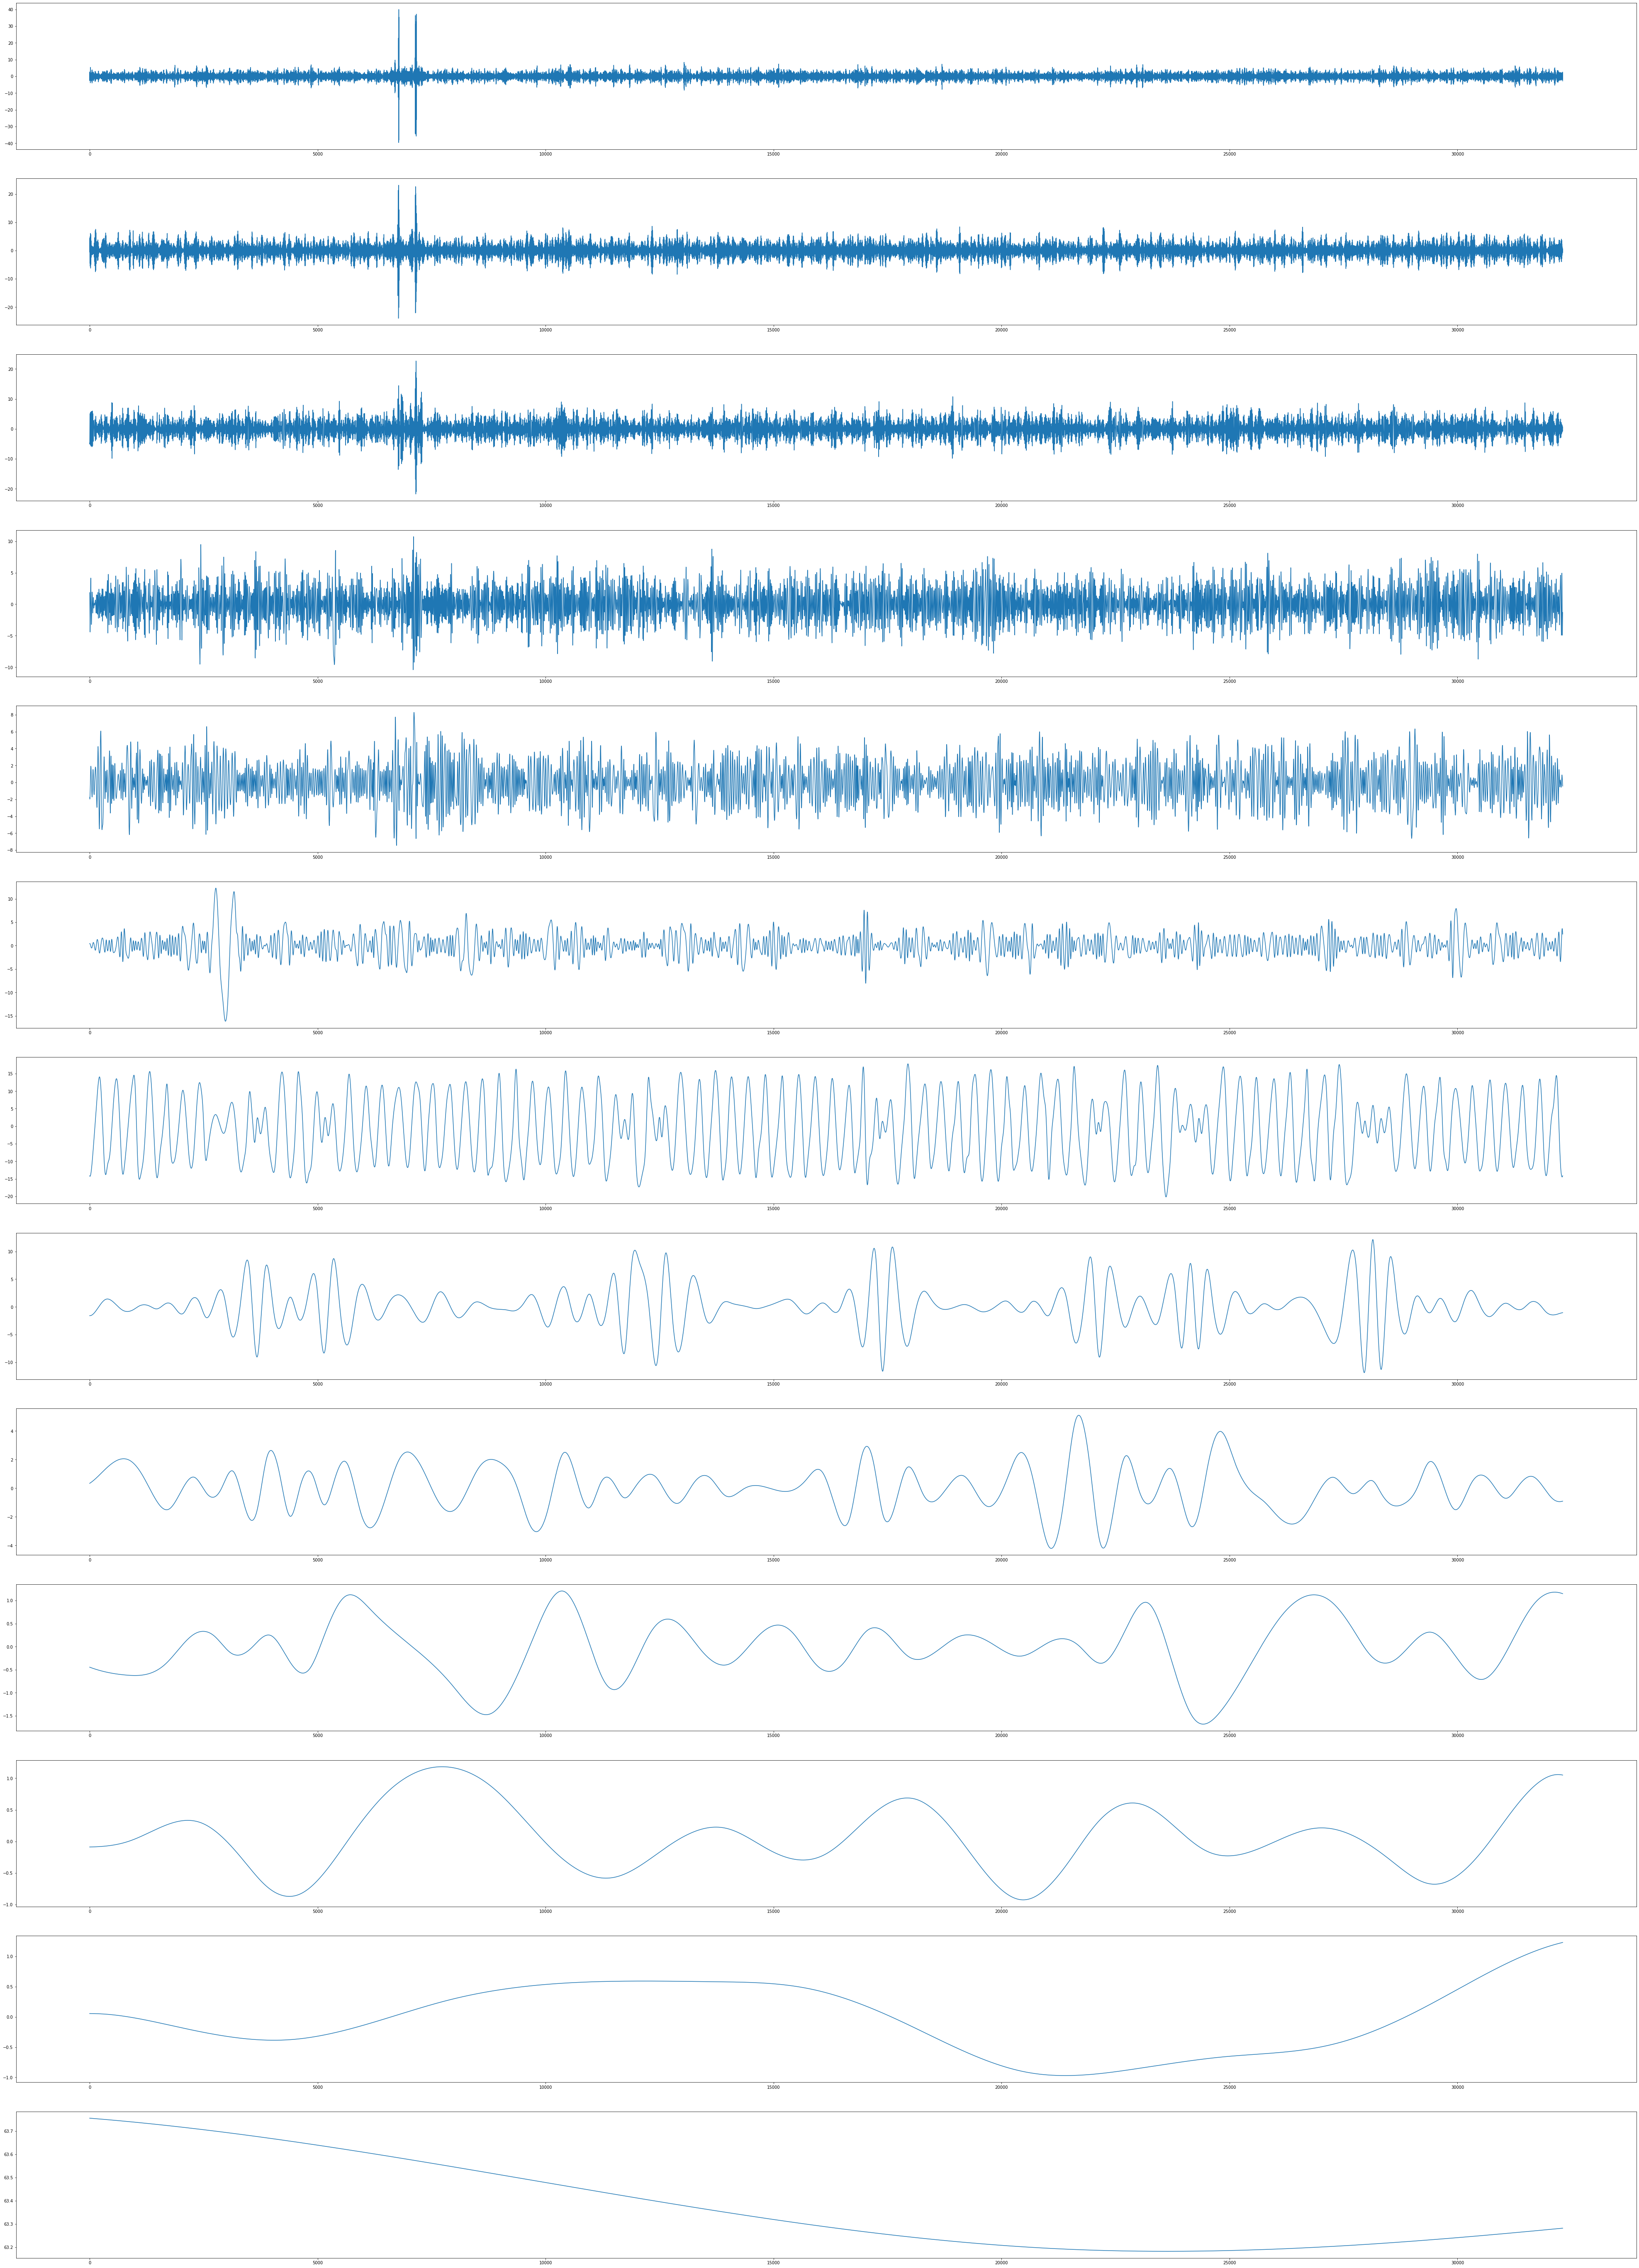

In [20]:
print("imfs_subplot_%s.jpg"%SITE_CODE)
fig, axes = plt.subplots(len(imfs), 1)
_ = [axes[i].plot(imfs[i]) for i in range(len(imfs))]
plt.gcf().set_size_inches(70, 100)
plt.savefig("./fig/imfs_subplot_%s.jpg"%SITE_CODE)
plt.show()

In [47]:
imfs[12]

array([63.75504205, 63.75502635, 63.75501065, ..., 63.28170236,
       63.28172117, 63.28173997])

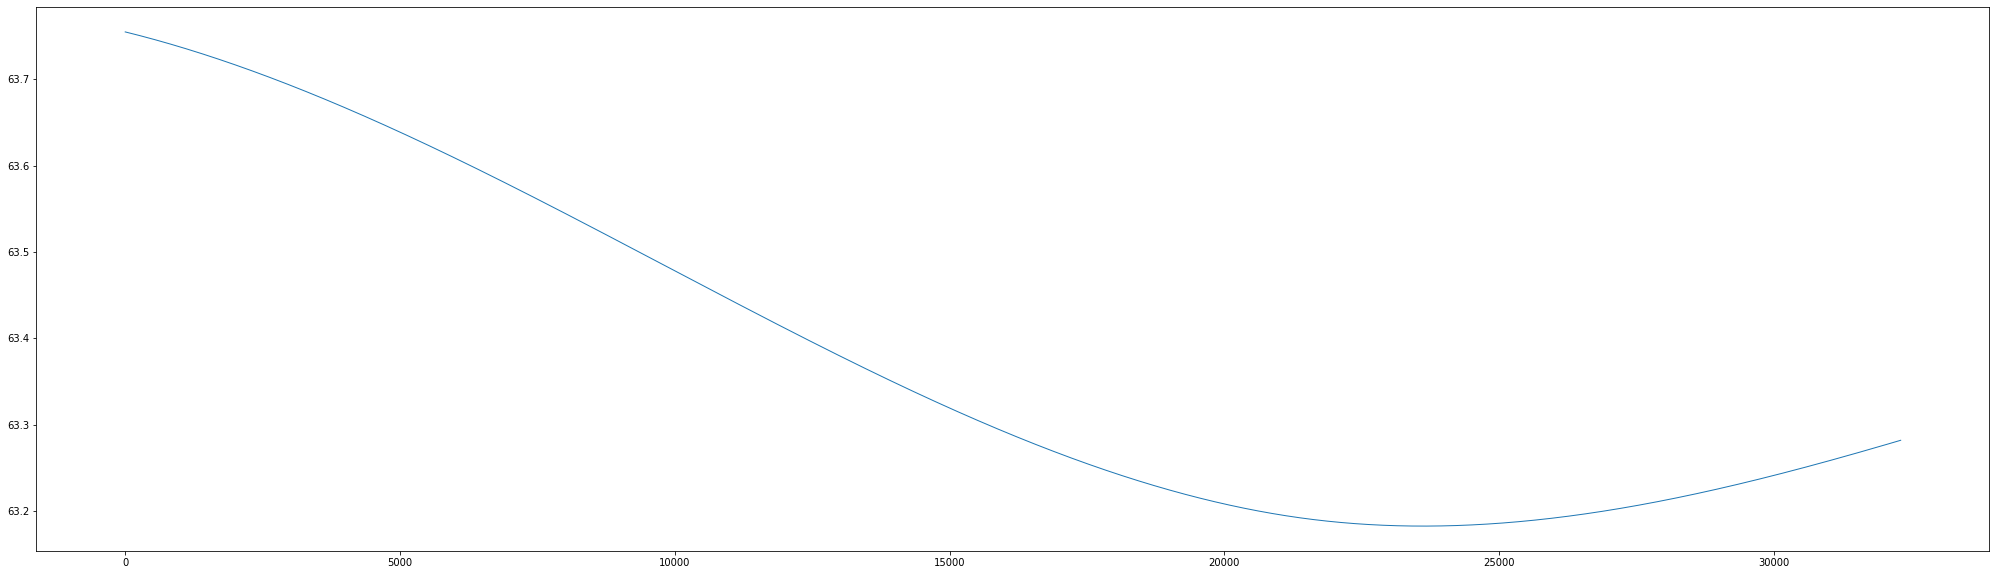

In [46]:
plt.plot(imfs[12], linewidth=1)
plt.gcf().set_size_inches(35, 10)
plt.savefig("""./fig/imfs[0]_%s.jpg"""%SITE_CODE)
plt.show()